# Linear Regression on Bike Rentals

In this notebook we explore a bike rental dataset with a linear regression model. We aim to find the predictors for the number of bike rentals in a city and use them in a model.

# Data Import

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We can see that the data already has been cleaned and there are no null values and is already in numerical form. It also already has an index column so we can use that as the index

In [5]:
df.set_index('instant', inplace=True)

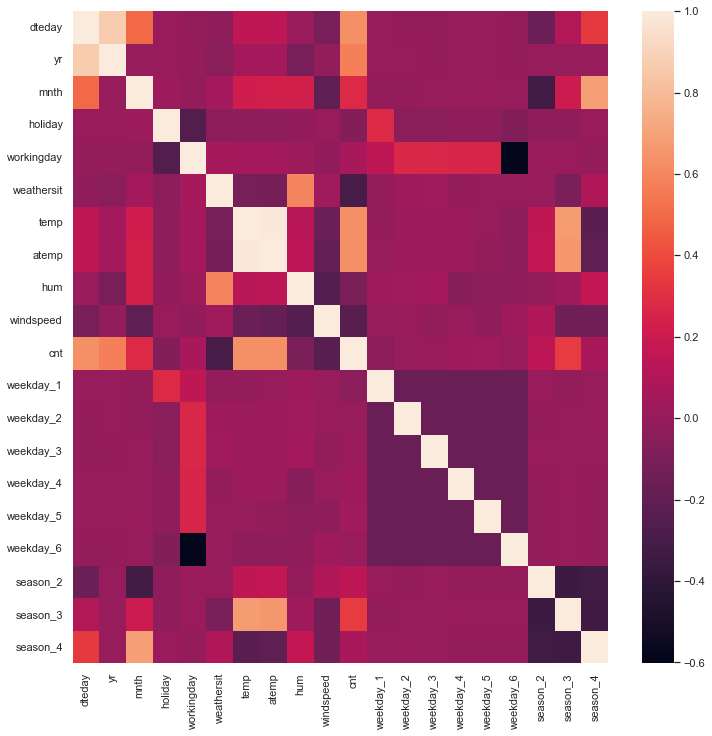

In [35]:
import seaborn as sns

# We can also take a preliminary look at the correlation between the variables
df.corr()
sns.heatmap(df.corr())
sns.set(rc={'figure.figsize':(12,12)})


# Data Preparation

In [7]:
# Since we are instructed to use the 'cnt' column as our target variable, we will drop the 'casual' and 'registered' columns,
df.drop(['casual', 'registered'], axis=1, inplace=True)

# ...and Convert the dteday column to count the number of days since the first day in the dataset.
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')
df['dteday'] = df['dteday'] - df['dteday'].min()
df['dteday'] = df['dteday'].dt.days

## Dummy variables
We have a couple of variables like the weekday that we can convert to dummy variables.
Let's also drop the first column from status df using 'drop_first = True'. The information is retained in the other columns as we know that if the value is 0 in all the columns, then the value must be 1 in the first column


In [8]:

weekdays = pd.get_dummies(df['weekday'], drop_first=True, prefix='weekday')

# Add the results to the original dataframe
df = pd.concat([df, weekdays], axis = 1)

# Now let's see the head of our dataframe.
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
instant,,,,,,,,,,,,,,,,,,,
1,0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,1
2,1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0
3,2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0
4,3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0
5,4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0,0


In [9]:
# Let's do the same for the 'season' column
season = pd.get_dummies(df['season'], drop_first=True, prefix='season')

df = pd.concat([df, season], axis = 1)

# And drop the original 'season' and 'weekday' columns
df.drop(['season', 'weekday'], axis=1, inplace=True)

df.head()

,dteday,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,season_2,season_3,season_4
instant,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,1,0,0,0
2,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0
3,2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0
4,3,0,1,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,0
5,4,0,1,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0,0,0,0,0


The weather situation could be converted to dummy variables but already has a sensible order (1=best to 4=worst) and can be treated as a continuous factor.

# Data Split

In [10]:
from sklearn.model_selection import train_test_split

# We split the data into training and testing sets

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

# Rescaling

In [11]:
# We will now scale the features using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
# Apply the scaler to all the columns (except the 'dummy'- and time variables)
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,dteday,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,season_2,season_3,season_4
instant,,,,,,,,,,,,,,,,,,,,
654,653,1,10,0,1,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,1,0,0,0,0,0,0,1
577,576,1,7,0,1,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,0,0,0,0,1,0
427,426,1,3,0,0,2,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,0,1,0,0,0
729,728,1,12,0,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,0,0
483,482,1,4,0,0,2,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,0,0,0,1,1,0,0


# Set count as Y

In [13]:
# In the last preparation step, we will divide the data into X and y sets for the model building

y_train = df_train.pop('cnt')
X_train = df_train

# Model Building

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [15]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)
rfe = rfe.fit(X_train, y_train)


In [16]:
# Listing the variables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('dteday', False, 2),
 ('yr', True, 1),
 ('mnth', False, 2),
 ('holiday', False, 2),
 ('workingday', False, 2),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekday_1', False, 2),
 ('weekday_2', False, 2),
 ('weekday_3', False, 2),
 ('weekday_4', False, 2),
 ('weekday_5', False, 2),
 ('weekday_6', False, 2),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1)]

In [17]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4'],
      dtype='object')

In [18]:
X_train.columns[~rfe.support_]

Index(['dteday', 'mnth', 'holiday', 'workingday', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

# statsmodel model statistics

To gain more insights into our model we can use the statsmodels library that offers more information.

In [19]:
import statsmodels.api as sm

In [20]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     247.1
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          9.89e-178
Time:                        21:51:50   Log-Likelihood:                 470.75
No. Observations:                 510   AIC:                            -921.5
Df Residuals:                     500   BIC:                            -879.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2923      0.027     10.950      0.0

atemp the temperature by feel seems to be insignificant which is not surprising given that we also have the actual temperature. atemp can be removed as the worse predictor.

In [21]:
X_train_2 = X_train_rfe.drop(["atemp"], axis = 1)

Repeat the last steps without the atemp

In [23]:
X_train_lm = sm.add_constant(X_train_2)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     278.3
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          6.56e-179
Time:                        21:51:50   Log-Likelihood:                 470.61
No. Observations:                 510   AIC:                            -923.2
Df Residuals:                     501   BIC:                            -885.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2935      0.027     11.037      0.0

In [22]:
X_train_2 = X_train_2.drop(['const'], axis=1)

In [24]:
X_train_2.columns

Index(['yr', 'weathersit', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4'],
      dtype='object')

In [25]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.98
2,temp,21.68
1,weathersit,12.50
6,season_3,6.43
4,windspeed,3.78
5,season_2,3.34
7,season_4,2.47
0,yr,2.02


# Residual Analysis

Let's now check if the error terms are normally distributed, as they should be for linear regression.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

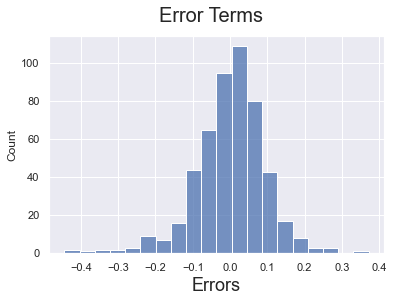

In [28]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)     

Looking at the distribution of the error terms we see that they are normally distributed, which is one assumption we made about the data when we chose linear regression as our model.

# Predicting

In [29]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [30]:
y_test = df_test.pop('cnt')
X_test = df_test

In [31]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_2 = X_test[X_train_2.columns]

# Adding a constant variable 
X_test_2 = sm.add_constant(X_test_2)

In [32]:
# Making predictions
y_pred = lm.predict(X_test_2)

Text(0, 0.5, 'y_pred')

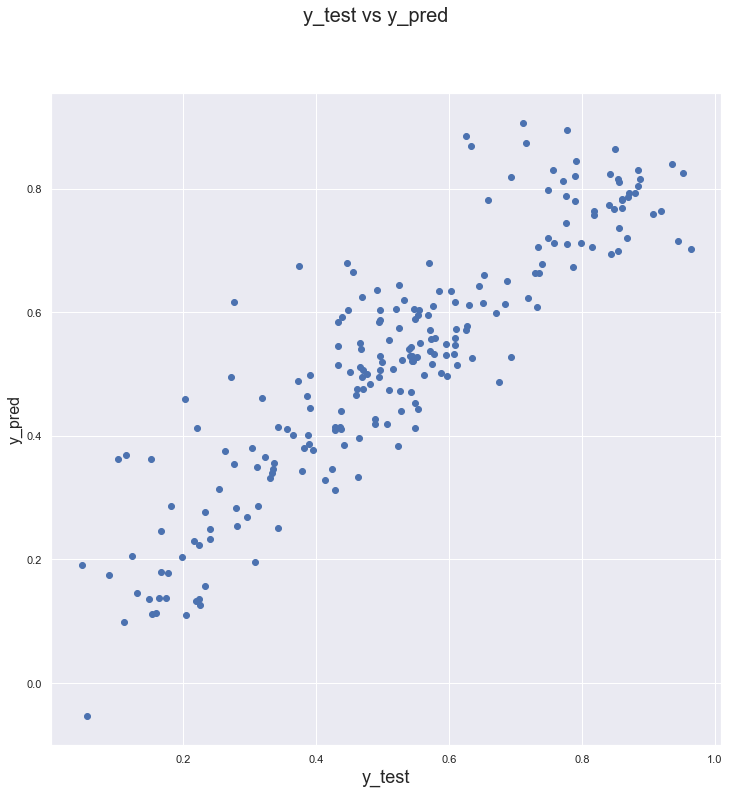

In [37]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.7998404681175328

This concludes our analysis. We can now use the model to make predictions about how many bike might be needed given a day and weather conditions.